In [ ]:
# Installing Kaggle CLI 
!pip install kaggle

# Adding Kaggle configuration file to root, to access kaggle API
!cp kaggle.json /root/.kaggle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
'''
We will access the dataset from three datasets. The datasets will be downloaded in three different formats (csv, json, and xlsx).
We will access the same dataset from three different resources in three different formats and will take one third from each dataset and merge those
to create the final dataset for analysis.

Merging different datasets can rendor the final dataset useless. So, just to show the procedure we are doing this thing.

The used dataset is World Happiness Report 2021. We are analyzing the mortality rate in year 2020 and 2021, we will see the effect of Covid-19 spread on death rates in 
each year.
'''

# reading excel sheet of mortality data from World Happiness report portal
dataframe1 = pd.read_excel("https://happiness-report.s3.amazonaws.com/2021/MortalityDataWHR2021C2.xlsx")
dataframe1.head()

# reading json file from system
dataframe2 = pd.read_json("MortalityDataWHR2021C2.json")
dataframe2.head()

# Downloading the Dataset from Kaggle
!kaggle datasets download -d mathurinache/world-happiness-report-2021

# Extracting the downloaded zip file
!unzip -u world-happiness-report-2021.zip

# Loading the dataframe from downloaded CSV file (from Kaggle)
dataframe3 = pd.read_csv("MortalityDataWHR2021C2.csv")

'''
Now, as we have successfully loaded data. We will pick up one third of each dataset, the portion will be non-overlaping so combining them will result in whole dataset.
'''
# Taking non-overlapping splits from each dataframe
dataframe1 = dataframe1[:50]
dataframe2 = dataframe2[50:100]
dataframe3 = dataframe3[100:]

'''
We will perform the merge in two steps, as required in evaluation criteria. The initial merge will combine dataframe1 and dataframe2.
The second merge will merge first merge's result with dataframe3.
'''
merge1 = pd.concat([dataframe1, dataframe2])
final_data = pd.concat([merge1, dataframe3])

In [3]:
final_data.head()

,Country name,Population 2020,Population 2019,"COVID-19 deaths per 100,000 population in 2020",Median age,Island,Index of exposure to COVID-19 infections in other countries as of March 31,Log of average distance to SARS countries,WHO Western Pacific Region,Female head of government,Index of institutional trust,Gini coefficient of income,"All-cause death count, 2017","All-cause death count, 2018","All-cause death count, 2019","All-cause death count, 2020","Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average"
0,United States,331002647.0,328239523.0,104.451,38.3,0,1.6875,9.3149,0,0,0.250043,47.51,2810927.0,2839076.0,2852747.0,3424996.0,179.22
1,Egypt,102334403.0,100388073.0,7.4569,25.3,0,1.62667,9.00686,0,0,0.445924,31.56,NaN,NaN,NaN,NaN,NaN
2,Morocco,36910558.0,36471769.0,20.016,29.6,0,2.33605,9.22601,0,0,0.397255,39.55,NaN,NaN,NaN,NaN,NaN
3,Lebanon,6825442.0,6855713.0,21.5078,31.1,0,1.89143,8.95601,0,0,0.106633,31.83,NaN,NaN,NaN,NaN,NaN
4,Saudi Arabia,34813867.0,34268528.0,17.8751,31.9,0,1.25048,8.8968,0,0,0.650619,45.9,NaN,NaN,NaN,NaN,NaN


In [4]:
# Number of rows
final_data.shape[0]

166

In [5]:
# Basic information about each data point
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 0 to 165
Data columns (total 17 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   Country name                                                                 166 non-null    object 
 1   Population 2020                                                              164 non-null    float64
 2   Population 2019                                                              164 non-null    float64
 3   COVID-19 deaths per 100,000 population in 2020                               163 non-null    object 
 4   Median age                                                                   163 non-null    object 
 5   Island                                                                       166 non-null    int64  
 6   Index of exposure to COVID-19  infections 

#### NaN Value handling
From the above description of datasets, we can see that the columns containing All Cause Death of previous four years contain a lot of values. So, we can drop those columns and then we can drop all the rows containing NaN values.

In [6]:
# Columns which needs to be dropped
drp_cols = final_data.columns[12:17]

# Dropping the selected columns
final_data = final_data.drop(drp_cols, axis  =1)

In [7]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 0 to 165
Data columns (total 12 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   Country name                                                                 166 non-null    object 
 1   Population 2020                                                              164 non-null    float64
 2   Population 2019                                                              164 non-null    float64
 3   COVID-19 deaths per 100,000 population in 2020                               163 non-null    object 
 4   Median age                                                                   163 non-null    object 
 5   Island                                                                       166 non-null    int64  
 6   Index of exposure to COVID-19  infections 

In [8]:
final_data = final_data.dropna(how = "any")

In [9]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 0 to 165
Data columns (total 12 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   Country name                                                                 163 non-null    object 
 1   Population 2020                                                              163 non-null    float64
 2   Population 2019                                                              163 non-null    float64
 3   COVID-19 deaths per 100,000 population in 2020                               163 non-null    object 
 4   Median age                                                                   163 non-null    object 
 5   Island                                                                       163 non-null    int64  
 6   Index of exposure to COVID-19  infections 

#### Convert Gini Coefficient to numerical(float) data type
The gini coefficient is interpreted as object type by tge pandas. The reason for this behaviour is that for few of the values, the "," was written in place of ".". This will make pandas understand the type as non-numerical. The same mistake occured for several varibles.

We will convert remove all these commas to dot after converting them to string and then will convert them to float.

In [10]:
# Function to remove commas from a string
def remove_commas(x):
    x = x.replace(",", ".")
    return x

# converting the column values to string
# Here we are accessing the column as 12th column of the dataframe, as name of the column is very big, 
# we simply take the name of the column from list of column names returned by pandas.
final_data[final_data.columns[11]] = final_data[final_data.columns[11]].astype(str)

# Applying the remove_comma function to all values of the columns
final_data[final_data.columns[11]] = final_data[final_data.columns[11]].apply(remove_commas)

# Converting the values to float
final_data[final_data.columns[11]] = final_data[final_data.columns[11]].astype(float)

#### Convert the Index of Institutional Trust to numerical(float) data type
The "Index of Institutional Trust" is also interpret as "Gini Coefficient of income". We will convert this column also as we converted "Gini Coefficient of Income".

In [11]:
final_data[final_data.columns[10]] = final_data[final_data.columns[10]].astype(str)

# Applying the remove_comma function to all values of the columns
final_data[final_data.columns[10]]= final_data[final_data.columns[10]].apply(remove_commas)

final_data[final_data.columns[10]] = final_data[final_data.columns[10]].astype(float)

#### Convert the COVID-19 deaths per 100,000 population in 2020  to numerical(float) data type
The "COVID-19 deaths per 100,000 population in 2020 " is also interpreted as "Gini Coefficient of income". We will convert this column also as we converted "Gini Coefficient of Income".

In [12]:
final_data[final_data.columns[3]] = final_data[final_data.columns[3]].astype(str)

# Applying the remove_comma function to all values of the columns
final_data[final_data.columns[3]]= final_data[final_data.columns[3]].apply(remove_commas)

final_data[final_data.columns[3]] = final_data[final_data.columns[3]].astype(float)

#### Convert the Median Age  to numerical(float) data type
The "COVID-19 deaths per 100,000 population in 2020 " is also interpreted as "Gini Coefficient of income". We will convert this column also as we converted "Gini Coefficient of Income".

In [13]:
final_data[final_data.columns[4]] = final_data[final_data.columns[4]].astype(str)

# Applying the remove_comma function to all values of the columns
final_data[final_data.columns[4]]= final_data[final_data.columns[4]].apply(remove_commas)

final_data[final_data.columns[4]] = final_data[final_data.columns[4]].astype(float)

#### Convert the Index of exposure to COVID-19  infections in other countries as of March 31  to numerical(float) data type
The "COVID-19 deaths per 100,000 population in 2020 " is also interpreted as "Gini Coefficient of income". We will convert this column also as we converted "Gini Coefficient of Income".

In [14]:
final_data[final_data.columns[6]] = final_data[final_data.columns[6]].astype(str)

# Applying the remove_comma function to all values of the columns
final_data[final_data.columns[6]]= final_data[final_data.columns[6]].apply(remove_commas)

final_data[final_data.columns[6]] = final_data[final_data.columns[6]].astype(float)

#### Convert the Log of average distance to SARS countries   to numerical(float) data type
The "COVID-19 deaths per 100,000 population in 2020 " is also interpreted as "Gini Coefficient of income". We will convert this column also as we converted "Gini Coefficient of Income".

In [15]:
final_data[final_data.columns[7]] = final_data[final_data.columns[7]].astype(str)

# Applying the remove_comma function to all values of the columns
final_data[final_data.columns[7]]= final_data[final_data.columns[7]].apply(remove_commas)

final_data[final_data.columns[7]] = final_data[final_data.columns[7]].astype(float)

In [16]:
# Basic Statistical Description of all Columns
final_data.describe()

,Population 2020,Population 2019,"COVID-19 deaths per 100,000 population in 2020",Median age,Island,Index of exposure to COVID-19 infections in other countries as of March 31,Log of average distance to SARS countries,WHO Western Pacific Region,Female head of government,Index of institutional trust,Gini coefficient of income
count,1.630000e+02,1.630000e+02,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,4.743424e+07,4.671117e+07,30.704021,30.667485,0.134969,1.675799,9.057546,0.085890,0.141104,0.315727,37.956339
std,1.603294e+08,1.572632e+08,38.194209,9.332182,0.342744,1.304413,0.376638,0.281064,0.349202,0.173388,8.277317
min,3.412500e+05,3.613130e+05,0.000000,15.100000,0.000000,0.379029,8.044208,0.000000,0.000000,0.046448,23.200000
25%,4.825998e+06,4.715246e+06,1.680150,21.850000,0.000000,0.818266,8.929396,0.000000,0.000000,0.187729,32.325000
50%,1.132662e+07,1.126308e+07,10.125000,29.700000,0.000000,1.076000,9.070000,0.000000,0.000000,0.286000,37.343000
75%,3.414153e+07,3.392459e+07,46.802649,39.349999,0.000000,2.237639,9.310718,0.000000,0.000000,0.412937,43.850000
max,1.439324e+09,1.397715e+09,168.495697,48.200001,1.000000,6.343308,9.726268,1.000000,1.000000,0.905728,65.426000


## Correlation Table
Let us look at the correlation between each of these columns.

In [17]:
final_data.corr()

,Population 2020,Population 2019,"COVID-19 deaths per 100,000 population in 2020",Median age,Island,Index of exposure to COVID-19 infections in other countries as of March 31,Log of average distance to SARS countries,WHO Western Pacific Region,Female head of government,Index of institutional trust,Gini coefficient of income
Population 2020,1.000000,0.999947,-0.056084,0.025002,-0.037282,-0.085253,-0.235791,0.176302,-0.060123,0.130658,0.107084
Population 2019,0.999947,1.000000,-0.054830,0.026055,-0.036900,-0.084670,-0.235933,0.174896,-0.060148,0.130418,0.106458
"COVID-19 deaths per 100,000 population in 2020",-0.056084,-0.054830,1.000000,0.559788,-0.164123,0.646544,0.208336,-0.234948,-0.112023,-0.371844,-0.220135
Median age,0.025002,0.026055,0.559788,1.000000,0.154035,0.641452,-0.251365,0.170516,0.218870,-0.063090,-0.456755
Island,-0.037282,-0.036900,-0.164123,0.154035,1.000000,-0.107076,-0.041099,0.199310,0.046196,0.123073,0.045335
Index of exposure to COVID-19 infections in other countries as of March 31,-0.085253,-0.084670,0.646544,0.641452,-0.107076,1.000000,-0.068462,-0.183456,0.080229,-0.056488,-0.578238
Log of average distance to SARS countries,-0.235791,-0.235933,0.208336,-0.251365,-0.041099,-0.068462,1.000000,-0.555918,-0.144292,-0.345730,0.311096
WHO Western Pacific Region,0.176302,0.174896,-0.234948,0.170516,0.199310,-0.183456,-0.555918,1.000000,0.064436,0.189053,0.007596
Female head of government,-0.060123,-0.060148,-0.112023,0.218870,0.046196,0.080229,-0.144292,0.064436,1.000000,0.085884,-0.146376
Index of institutional trust,0.130658,0.130418,-0.371844,-0.063090,0.123073,-0.056488,-0.345730,0.189053,0.085884,1.000000,-0.021300


### Analysis Number of Covid Deaths in 2020 (per 100,000 population)
If we look at relation of Number of Deaths with other varibles. We can get following conclusion:
1. There is a strong positive correlation between Median Age and Number of Deaths per 100,000 people in the country.
2. There is a positive correlation of with distance of Log of avergae of SARs countries.
3. There is Female Head of Govt, Index of Institutional Trust, and Gini Coefficient present strong/significant negative correlation with number of deaths per 100,000 population.
Let us Analyse these realtion one by one.

#### Number of Deaths and Gini Coefficient of Income
Let us look at the plot between Number of Deaths and Gini Coeff of income.

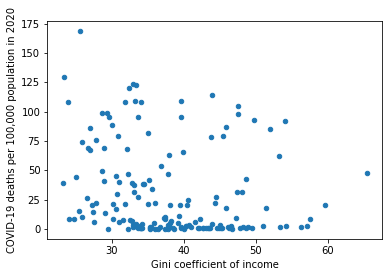

In [18]:
# Plotting the scatter plot using pandas plot
final_data.plot(x = final_data.columns[11], y = final_data.columns[3], kind = "scatter")
plt.show()

There are more points with high death value for small Gini Coefficient Value. Let us make a linear regression fit and look the trend of the points with increasing value of Gini Coefficient.

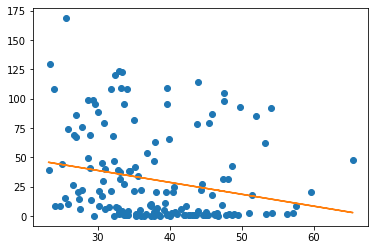

Value of slope =  -1.0157761992236838
Value of Intercept =  69.25916657692191


In [19]:
# Getting the values as numpy arrays to plot 
# Ref: https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python#:~:text=Use%20numpy.,the%20line%20of%20best%20fit.

# X is the Gini Index Column
x = final_data[final_data.columns[11]].to_numpy()

# Y is number of deaths
y = final_data[final_data.columns[3]].to_numpy()


# Scatter plot
plt.plot(x, y, 'o')

# Fit the linear regression
m, b = np.polyfit(x, y, 1)

# add the regression line on same plot
plt.plot(x, m*x + b)

# show the plot
plt.show()

# Value of slope and intercept for the regression fit.
print("Value of slope = ", m)
print("Value of Intercept = ", b)

We can cleary say that there is a decresing pattern with increasing Gini Coefficient.

##### Number of Deaths and Index of Institutional Trust
There was negative correlation observed between IIT (Index of Institutional Index) and Number of Death. Let us look at the scatter plot with regression fit.

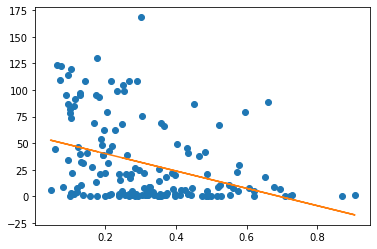

Value of slope =  -81.91064339472372
Value of Intercept =  56.56546183975287


In [20]:
# X is IIT
x = final_data[final_data.columns[10]].to_numpy()

# Y is number of deaths
y = final_data[final_data.columns[3]].to_numpy()

# plotting the scatter plot
plt.plot(x, y, 'o')

# Fitting the regression line
m, b = np.polyfit(x, y, 1)

# plotting the gression line
plt.plot(x, m*x + b)

# showing thr plot
plt.show()

# Values of slope and intercept
print("Value of slope = ", m)
print("Value of Intercept = ", b)

The plot looks similar but this one looks more strong, there are more high values of Death on lower side of IIT and quite a low values on higher side. The value of slope is also quite negative.

##### Number of Deaths and female Govt heads
Let us see whether there is any effect on number of deaths for female govt head in the country.

<AxesSubplot:title={'center':'COVID-19 deaths per 100,000 population in 2020'}, xlabel='Female head of government'>

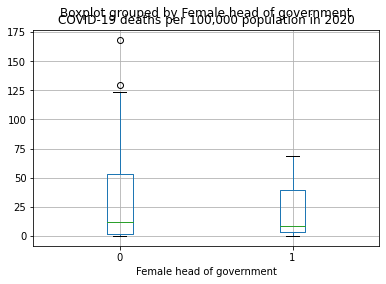

In [21]:
# Using pandas boxplot
final_data.boxplot(column = final_data.columns[3], by = final_data.columns[9])

The value looks a bit low for the Female head govt. There can be various aspects to it. The first thing can be due to female leader, the other part can be, the countries which have female leader are more educated and developed, so they are showing those traits from those attributes. So, let us compare the Gini index and IIT of the countries which have female leader and which doesn't have female leaders.

##### Box plot for Gini Index for countries which have female head and which doesn't


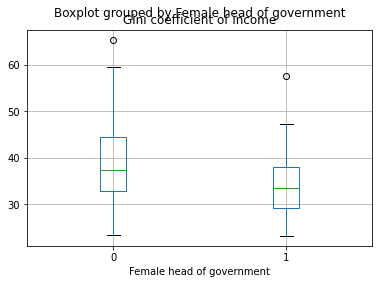

In [22]:
final_data.boxplot(column = final_data.columns[11], by = final_data.columns[9])
plt.show()

##### Box plot for IIT for countries which have female head and which doesn't

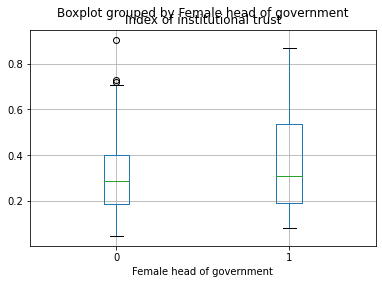

In [23]:
final_data.boxplot(column = final_data.columns[10], by = final_data.columns[9])
plt.show()

Here we can see that there is no significant difference for both values in each group. So, we can safely conclude that governments with female leaders were able to handle the situation in a better way.

#### Median Age and Number of deaths
If we look at the correlation matrix, there was a strong correlation between number of deaths and median age. Let us look at the scatter plot with linear regression for that too.

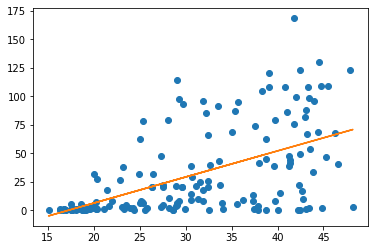

Value of slope =  2.2910677595848883
Value of Intercept =  -39.5572645407204


In [24]:
# X is IIT
x = final_data[final_data.columns[4]].to_numpy()

# Y is number of deaths
y = final_data[final_data.columns[3]].to_numpy()

# plotting the scatter plot
plt.plot(x, y, 'o')

# Fitting the regression line
m, b = np.polyfit(x, y, 1)

# plotting the gression line
plt.plot(x, m*x + b)

# showing thr plot
plt.show()

# Values of slope and intercept
print("Value of slope = ", m)
print("Value of Intercept = ", b)

The number of deaths increased  significantly  with increasing median age.

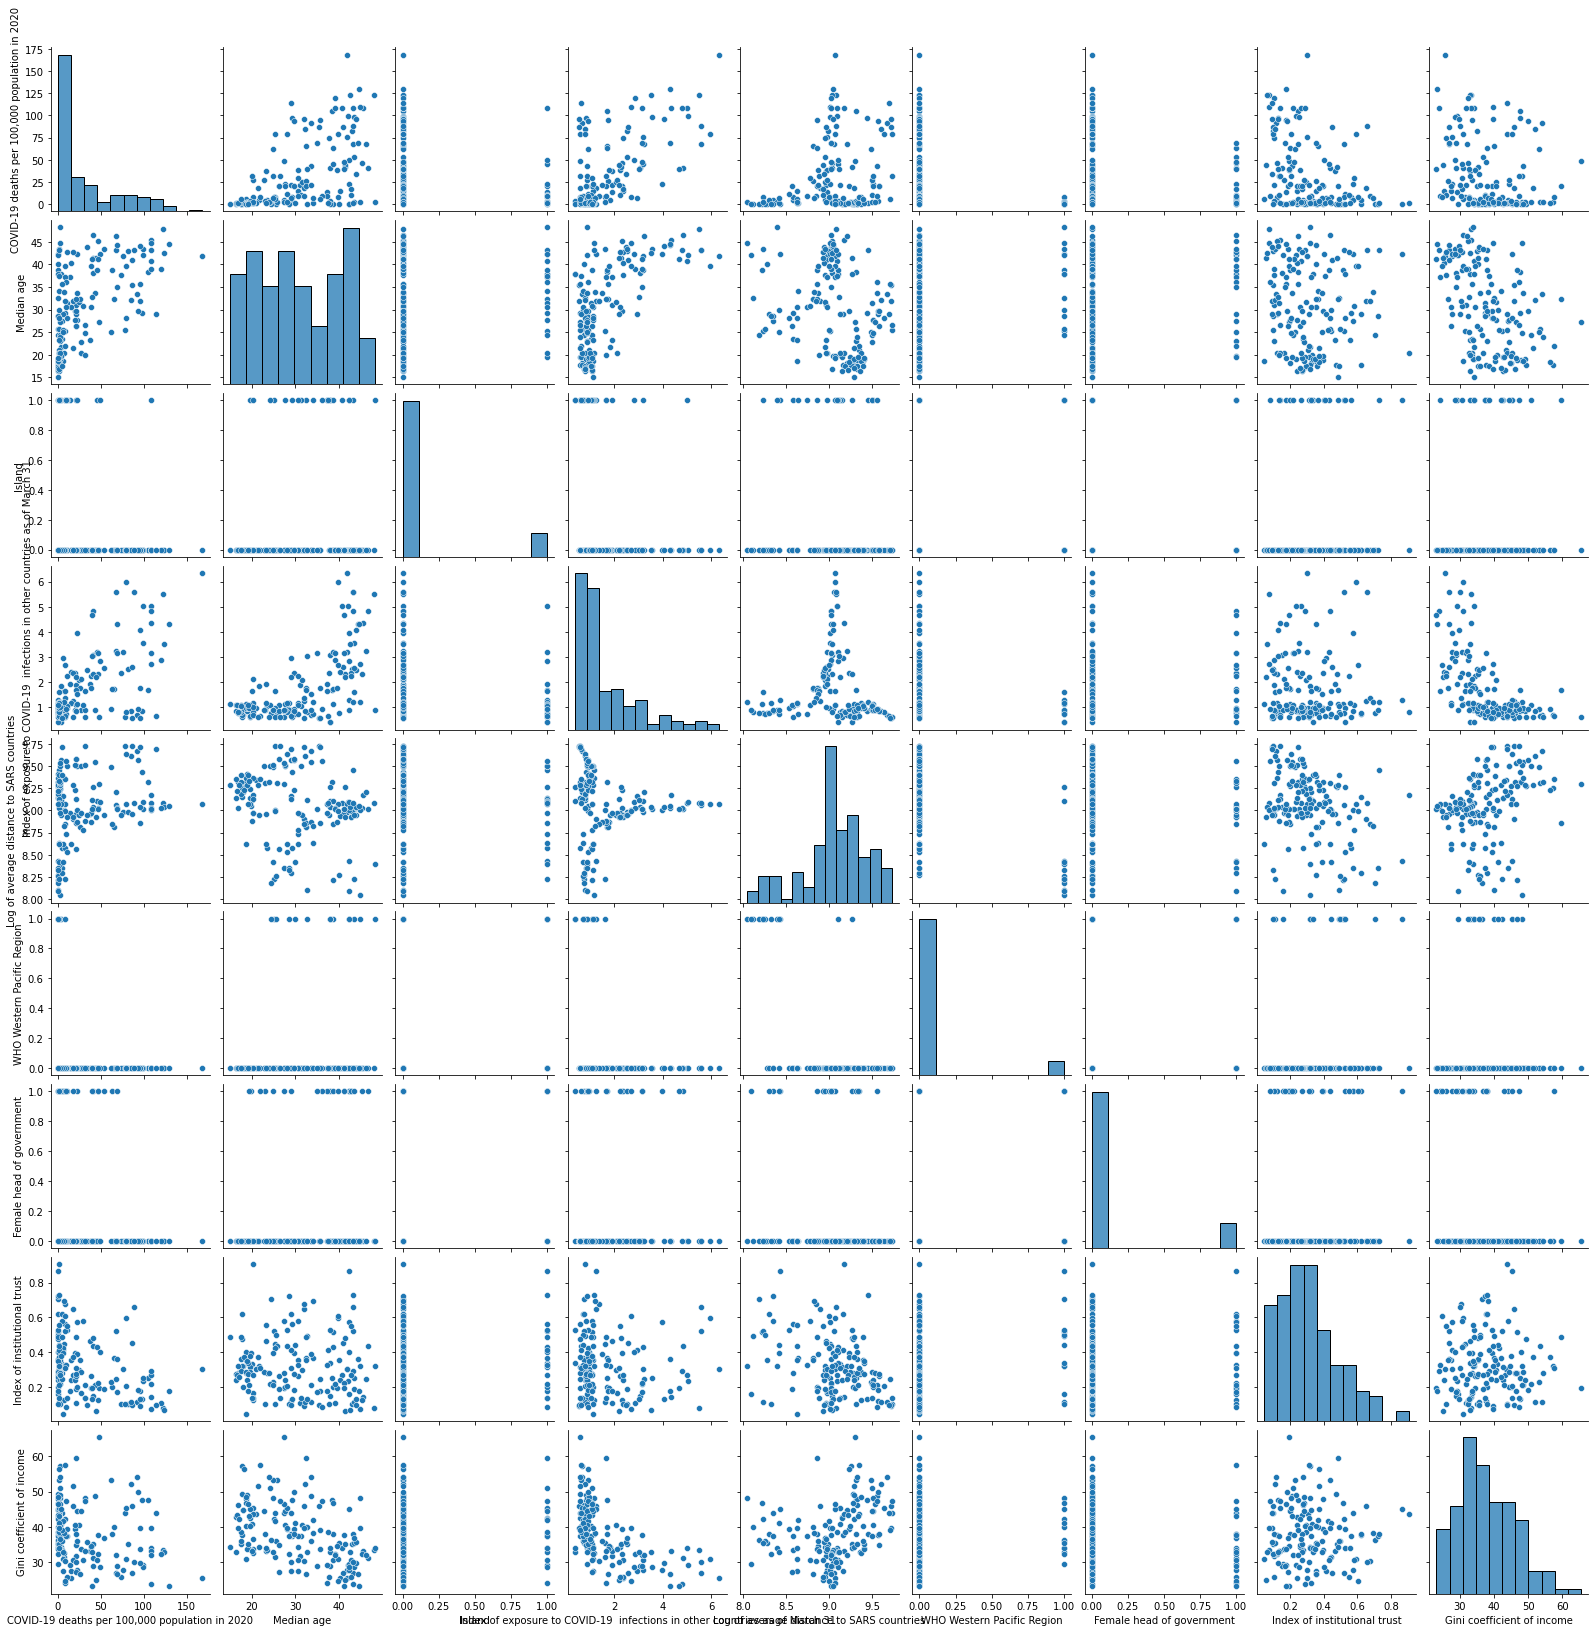

In [31]:
# Making the pairplot using seabron library to see the relation between pair 
import seaborn as sns
p_plot = sns.pairplot(final_data, vars = final_data.columns[3:])

## Conclusion
From the analysis made, we can conclude following points
1. The number of Covid Deaths per 100,000 were decreasing with increasing Gini Coefficient of Income.Thus,we conclude that the developed countries had more medical facilities, thus less deaths can occur than other countries. Although there is possibility of more Covid-Spread in those countries but the number of deaths were less.
2. The number covid deaths per 100,000 were decreasing with increasing Index of Institutional Trust, the deaths were decreasing.
3. The number of deaths in countries which had female government head were less compared to others. We further checked whether it may be due to other factors, but no special relation with other variables was observed. It is thus concluded that female head governments were able handle the pandemic in a better way than Male.
4. The number of deaths with Median age of the country increased. The elder people were more vulnerable to Covid, resulting in more deaths of elder people. Thus countries which had higher median, having more old people, reported higher amount of deaths.
5. If we look at the pair graphs above, there was observable relation between Gini Coefficient of income and Index of Institutional Trust. So, we can say that these attributes were the independent and major predictors for the Covid Deaths along with the Median age which is also not related to previous two attributes, according to pair plot.

## Significance of Work
The results of the analysis can be observed in the cell above. It was observed that better Index of Institutional Trust resulted in better crowd handling and awareness among the people.

So, after looking at the major three analysis variables, median age, Gini Coeff of Income, and Index of Institutional Trust, which seem independent to each at quite a significant level, we can say that the elder people are more prone and  needs special attention  as they are less immune. The better medical facilities will obvisouly result in better health care for infected people and better Index of institutional Trust will ensure that pandemics and events involving crowd handling should be handled with proper coordinations of all institutions of the country.

In [ ]:
assert False, "DO NOT REMOVE THIS LINE"

In [ ]:
%%bash
git pull
git add final.ipynb
git commit -a -m "Submitting the final project"
git push